In [229]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [230]:
'''X_train= df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold']]
       #RFE model selection
    '''


"X_train= df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',\n       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',\n       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',\n       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',\n       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\n       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',\n       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',\n       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',\n       'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',\n       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',\n       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\n       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',\n       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',\n       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',\n       'GarageCars', 'GarageArea', 'Woo

In [231]:
X_train= df[['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]#Selectmodeltree


In [232]:
y_train = df.pop("SalePrice")
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [233]:
#['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       #'1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']

In [234]:
X_train.isnull().any()

LotArea        False
OverallQual    False
YearBuilt      False
BsmtFinSF1     False
TotalBsmtSF    False
1stFlrSF       False
GrLivArea      False
GarageCars     False
GarageArea     False
dtype: bool

Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:

In [235]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)'

Sklearn pipeline + all features

In [236]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# select categorical and numerical column names
X_cat_columns = X_train.select_dtypes(exclude="number").copy().columns
X_num_columns = X_train.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore')
)


In [237]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)


In [238]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())
param_grid = {
    'decisiontreeregressor__max_depth': range(2, 12),
    'decisiontreeregressor__min_samples_leaf': range(3, 10, 2),
    'decisiontreeregressor__min_samples_split': range(3, 40, 5),
    'decisiontreeregressor__criterion':['squared_error']
    }

from sklearn.model_selection import GridSearchCV
 
decision_tree = GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process
    


In [239]:
decision_tree.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleI...
                                                                         Index([], dtype='ob

In [240]:
from sklearn.ensemble import RandomForestRegressor 

full_pipeline = make_pipeline(preprocessor, 
                              RandomForestRegressor())
param_grid = {
    'randomforestregressor__n_estimators':[100],
    'randomforestregressor__random_state':[123],
    'randomforestregressor__criterion':['squared_error']
    }
        
from sklearn.model_selection import GridSearchCV
 
forest= GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process


    


In [241]:
forest.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleI...
                                                                                            

MSE, RMSE, MAE, MAPE for decision tree


        MSE: 778875189.4058198
        RMSE: 27908.33548253675
        MAE: 17038.019650839866
        MAPE: 0.09762855339729656
        
498089.3333333333 59501.1


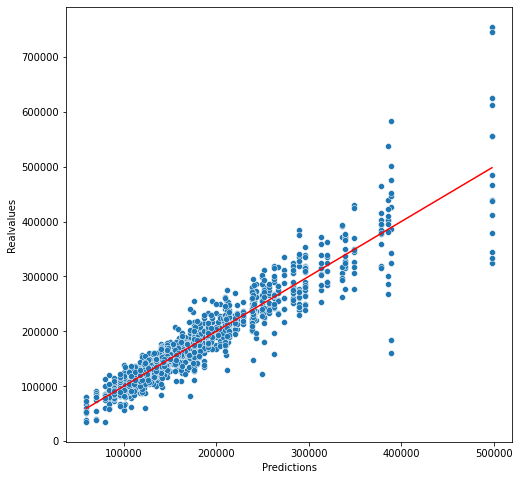

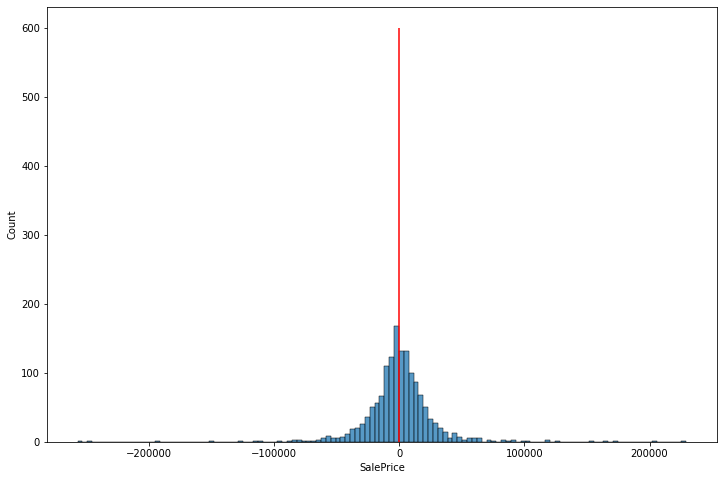

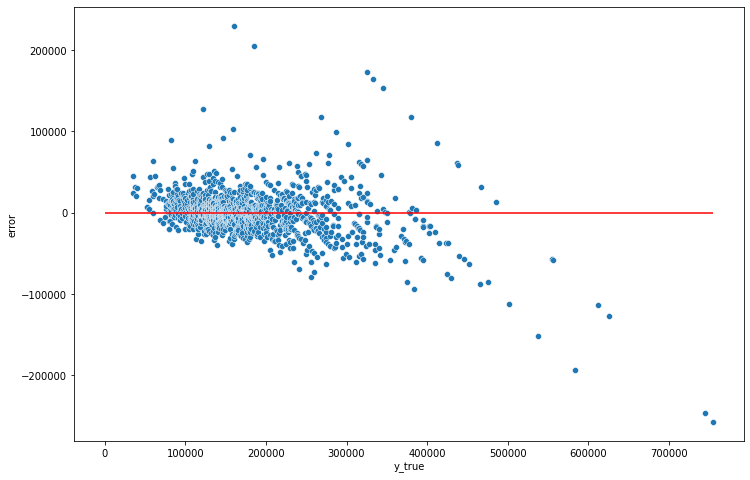

In [242]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

    

# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, decision_tree.predict(X_train))

MSE, RMSE, MAE, MAPE for Random forest model



        MSE: 123525792.03990568
        RMSE: 11114.215763602293
        MAE: 6783.026346379647
        MAPE: 0.04039464690727025
        
696185.8 46876.88


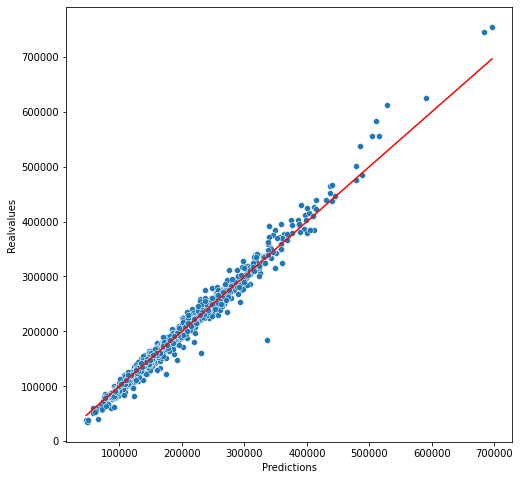

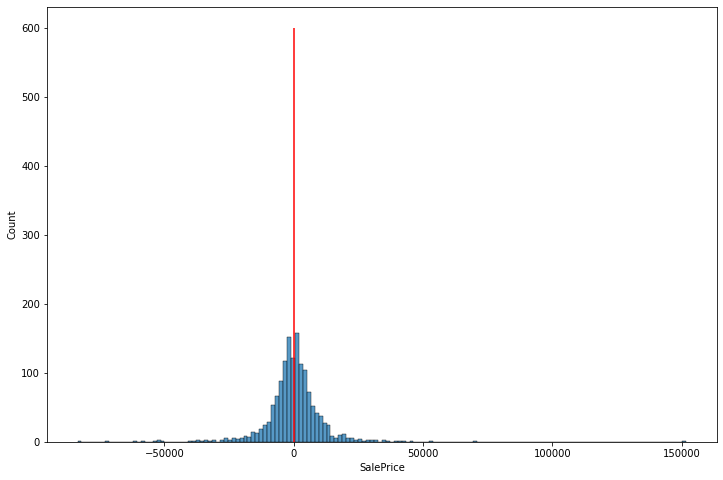

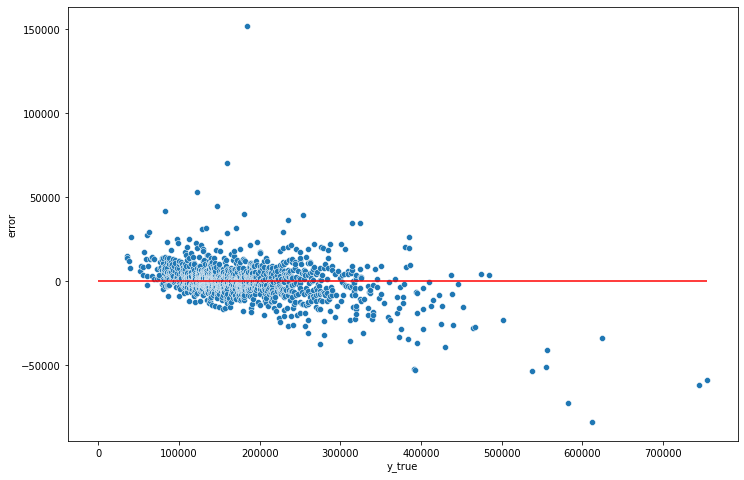

In [243]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

    

# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, forest.predict(X_train))

PCA (Principal Component Analysis)

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

full_pipeline = make_pipeline(preprocessor,
                              PCA(), 
                              RandomForestRegressor())
param_grid = {
    'randomforestregressor__n_estimators':[100],
    'randomforestregressor__random_state':[123],
    'randomforestregressor__criterion':['squared_error']
    }
        
from sklearn.model_selection import GridSearchCV
 
random= GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      n_jobs=-1,
                     ) # we want informative outputs during the training process

random.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleI...
                                                                                         ('o


        MSE: 174923741.0604419
        RMSE: 13225.873924260804
        MAE: 7858.297518917156
        MAPE: 0.04513233181928893
        
645965.57 47532.5


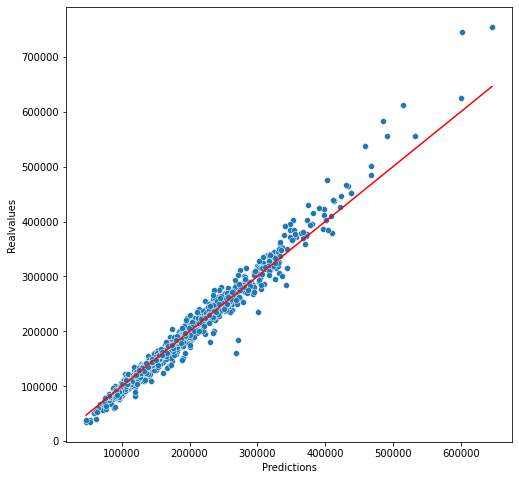

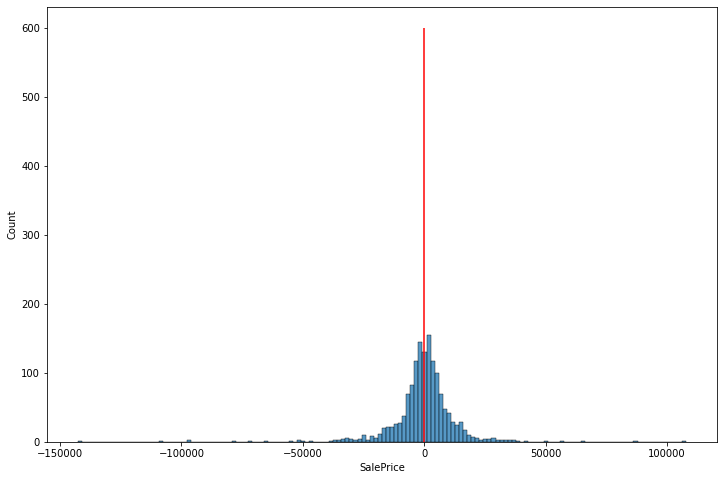

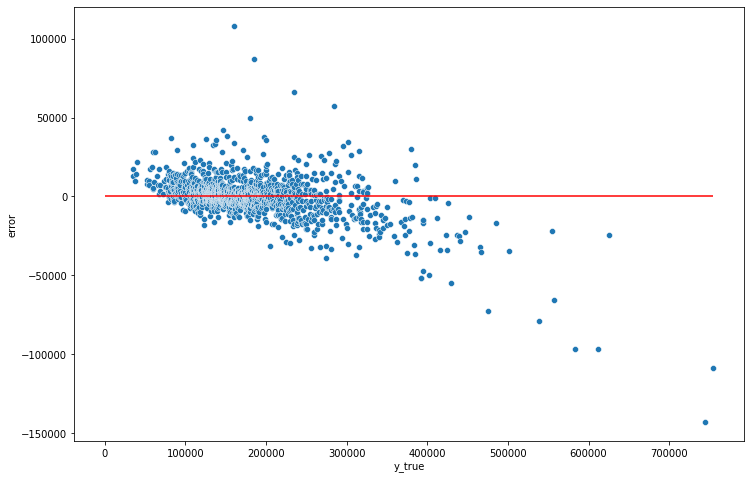

In [245]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
 # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

       
  
# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, random.predict(X_train))

In [246]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
full_pipeline = make_pipeline(preprocessor, 
                              PCA(),
                              DecisionTreeRegressor())
param_grid = {
    'decisiontreeregressor__max_depth': range(2, 12),
    'decisiontreeregressor__min_samples_leaf': range(3, 10, 2),
    'decisiontreeregressor__min_samples_split': range(3, 40, 5),
    'decisiontreeregressor__criterion':['squared_error']
    }
from sklearn.model_selection import GridSearchCV
 
decision_tree_PCA= GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      n_jobs=-1,
                     ) # we want informative outputs during the training process

decision_tree_PCA.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleI...
                                                                         Index([], dtype='ob


        MSE: 935884906.7440526
        RMSE: 30592.2360533527
        MAE: 19322.878463514626
        MAPE: 0.10776221104088207
        
498134.5 58123.444444444445


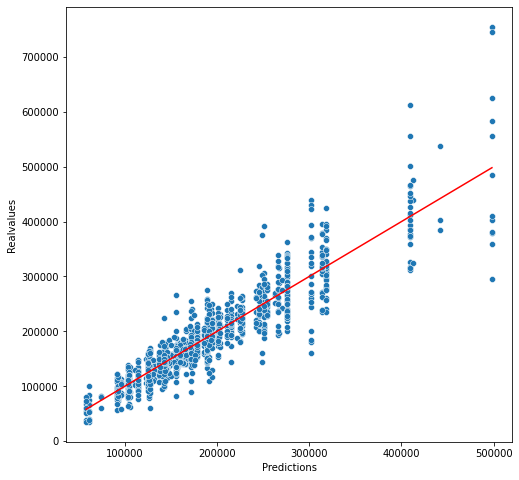

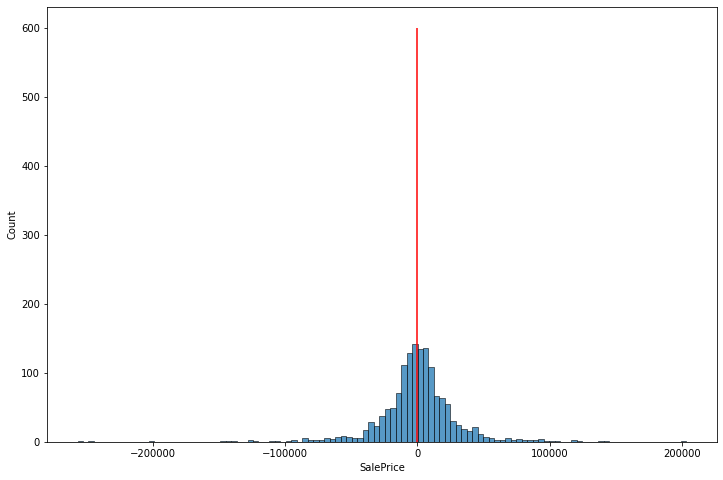

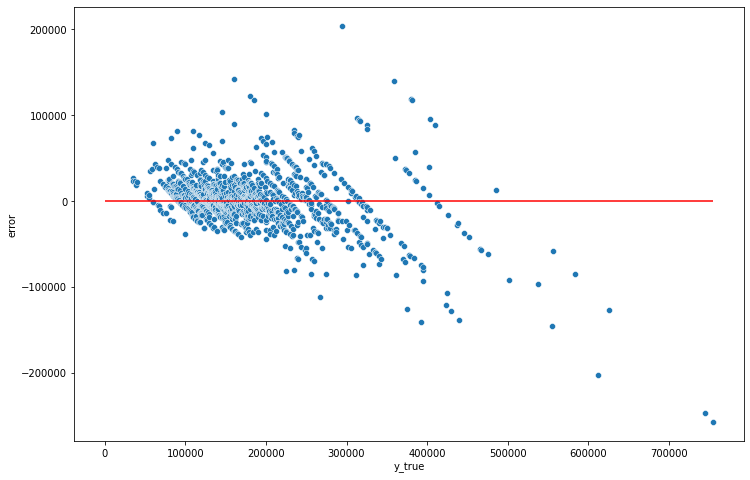

In [247]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
 # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

       
  
# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, decision_tree_PCA.predict(X_train))

In [248]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
full_pipeline = make_pipeline(preprocessor, 
                              PCA(),
                              Lasso())
param_grid = {
    'lasso__alpha':[1]
    }
from sklearn.model_selection import GridSearchCV
 
Lasso_PCA= GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      n_jobs=-1
                     ) # we want informative outputs during the training process

Lasso_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                       


        MSE: 1366551185.7835946
        RMSE: 36966.89310428447
        MAE: 22912.874103532635
        MAPE: 0.13949581168319064
        
688762.3029376754 34900


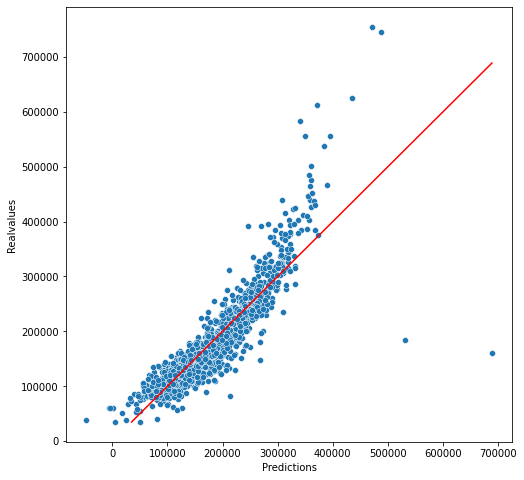

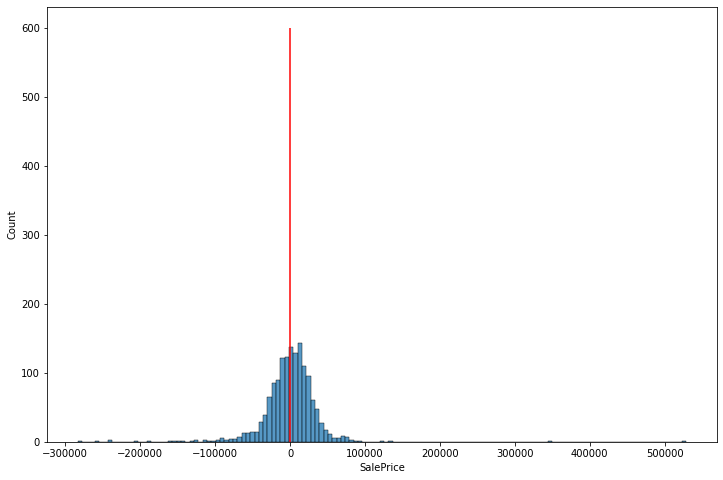

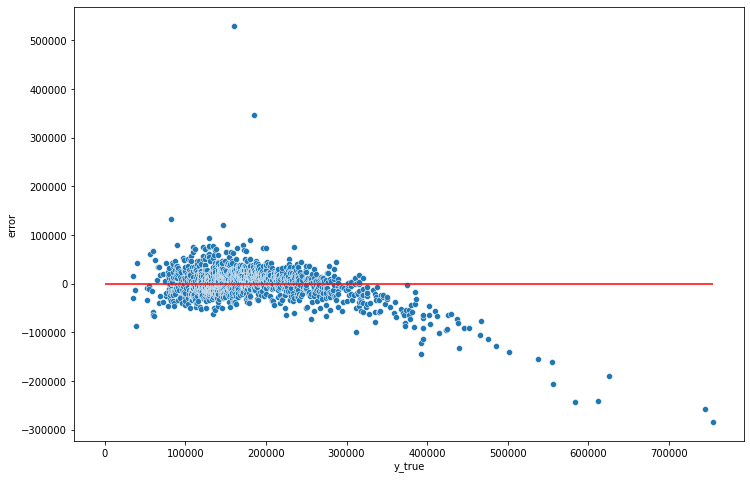

In [249]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

    
  
# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, Lasso_PCA.predict(X_train))

In [250]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
full_pipeline = make_pipeline(preprocessor, 
                              PCA(),
                              Ridge())
param_grid = {
     'ridge__alpha':[1]
    }
from sklearn.model_selection import GridSearchCV
 
Ridge_PCA= GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      n_jobs=-1
                     ) # we want informative outputs during the training process

Ridge_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                       


        MSE: 1366551980.1208985
        RMSE: 36966.903848184236
        MAE: 22908.72129860661
        MAPE: 0.13945841799529626
        
688959.0056934424 34900


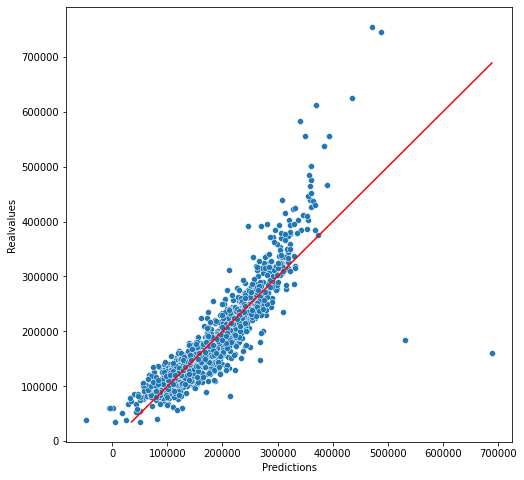

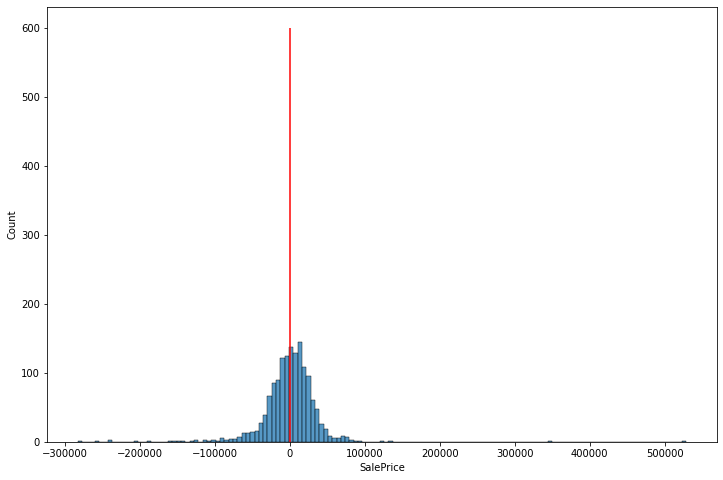

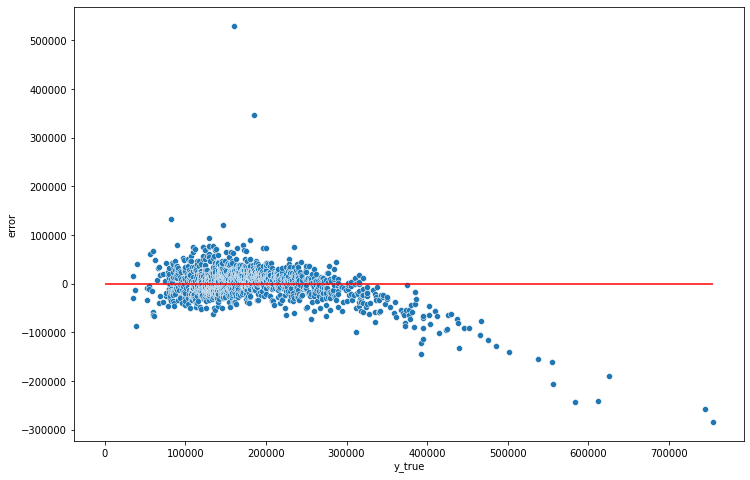

In [251]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

    
    
  
# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, Ridge_PCA.predict(X_train))

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
full_pipeline = make_pipeline(preprocessor,
                              PCA(n_components=None), 
                              LinearRegression())
param_grid = { 
              "linearregression__fit_intercept": [True, False]
             }
from sklearn.model_selection import GridSearchCV
 
linear_PCA = GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      n_jobs=-1) # we want informative outputs during the training process
linear_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                       


        MSE: 1366551175.0770361
        RMSE: 36966.89295947167
        MAE: 22913.358089178237
        MAPE: 0.1394998829260901
        
688737.3248475924 34900


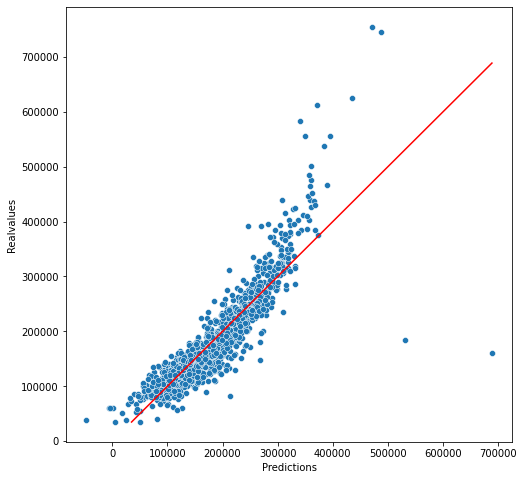

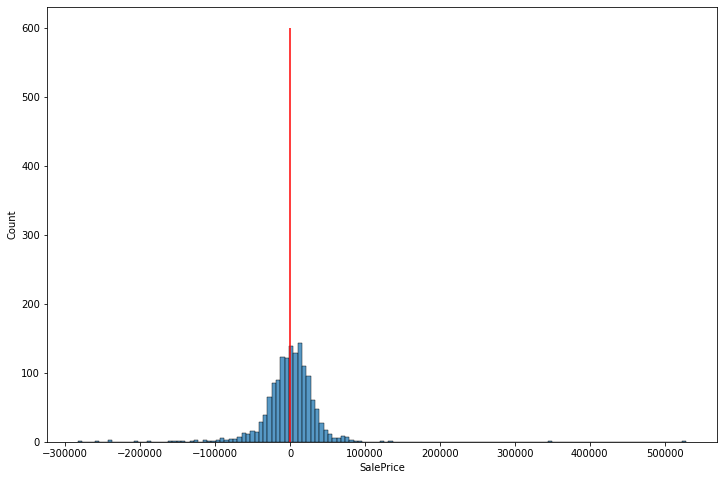

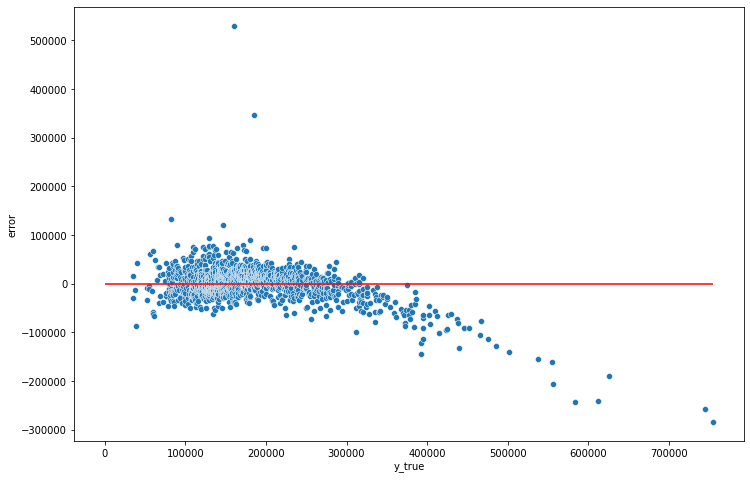

In [253]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Realvalues')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }

    
  
# plot_predictions(y_test, results['predictions'])

mod_res = plot_predictions(y_train, linear_PCA.predict(X_train))

In [254]:
test_file= pd.read_csv('/content/test.csv')

In [255]:
test_file= test_file[['Id','LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]

In [256]:
test_file.select_dtypes(include="object").columns

Index([], dtype='object')

In [257]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
category_list = test_file.select_dtypes(include="object").columns
print(category_list)

Index([], dtype='object')


In [258]:
for i in category_list:
    test_file[i] = LE.fit_transform(test_file[i])
test_file

,Id,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,1461,11622,5,1961,468.0,882.0,896,896,1.0,730.0
1,1462,14267,6,1958,923.0,1329.0,1329,1329,1.0,312.0
2,1463,13830,5,1997,791.0,928.0,928,1629,2.0,482.0
3,1464,9978,6,1998,602.0,926.0,926,1604,2.0,470.0
4,1465,5005,8,1992,263.0,1280.0,1280,1280,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,4,1970,0.0,546.0,546,1092,0.0,0.0
1455,2916,1894,4,1970,252.0,546.0,546,1092,1.0,286.0
1456,2917,20000,5,1960,1224.0,1224.0,1224,1224,2.0,576.0
1457,2918,10441,5,1992,337.0,912.0,970,970,0.0,0.0


In [259]:
random.predict(test_file)

array([131511.5 , 183409.5 , 189482.39, ..., 177567.68, 100401.44,
       236516.66])

In [260]:
result =random.predict(test_file)
test_file["SalePrice"] = result
test_file = test_file[["Id","SalePrice"]]
#test_file = test_file.reset_index()

In [261]:
test_file

,Id,SalePrice
0,1461,131511.50
1,1462,183409.50
2,1463,189482.39
3,1464,188619.99
4,1465,200066.51
...,...,...
1454,2915,84278.64
1455,2916,89219.00
1456,2917,177567.68
1457,2918,100401.44


In [262]:
'''test_file.to_csv("selected features with random PCA.csv", index = False)

from google.colab import files
files.download("selected features with random PCA.csv")
'''

'test_file.to_csv("selected features with random PCA.csv", index = False)\n\nfrom google.colab import files\nfiles.download("selected features with random PCA.csv")\n'